In [2]:
#import countingworkspace
#from countingworkspace import create_workspace, create_variables
#import countingworkspace.utils

import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

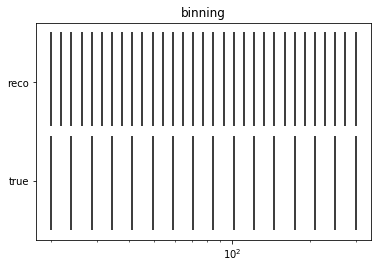

In [15]:
XMIN = 20
XMAX = 300
NBINS_TRUE = 15

xtrue_edges = np.logspace(np.log10(XMIN), np.log10(XMAX), NBINS_TRUE + 1)
xtrue_centers = 0.5 * (xtrue_edges[:1] + xtrue_edges[:-1])
xtrue_widths = np.diff(xtrue_edges)

xreco_edges = np.logspace(np.log10(XMIN), np.log10(XMAX), 2 * NBINS_TRUE + 1)
xreco_centers = 0.5 * (xreco_edges[:1] + xreco_edges[:-1])
NBINS_RECO = len(xreco_edges) - 1

fig, ax = plt.subplots()
ax.vlines(xtrue_edges, 0, 0.95)
ax.vlines(xreco_edges, 1.05, 2)
ax.set_xscale('log')

ax.set_yticks([0.5, 1.5])
ax.set_yticklabels(['true', 'reco'])
ax.set_title('binning')

plt.show()

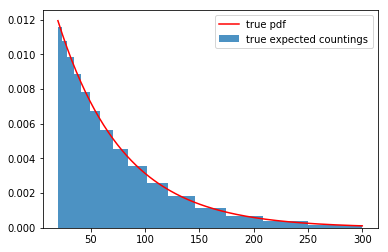

In [17]:
exponential = stats.expon(scale=60)

ntrue = np.diff(exponential.cdf(xtrue_edges))

x = np.linspace(XMIN, XMAX, 200)

fig, ax = plt.subplots()

ax.plot(x, (exponential.pdf(x)), 'r', label='true pdf')
ax.bar(xtrue_edges[:-1], ntrue / xtrue_widths, width=xtrue_widths, align='edge', alpha=0.8, label='true expected countings')
ax.legend()
plt.show()

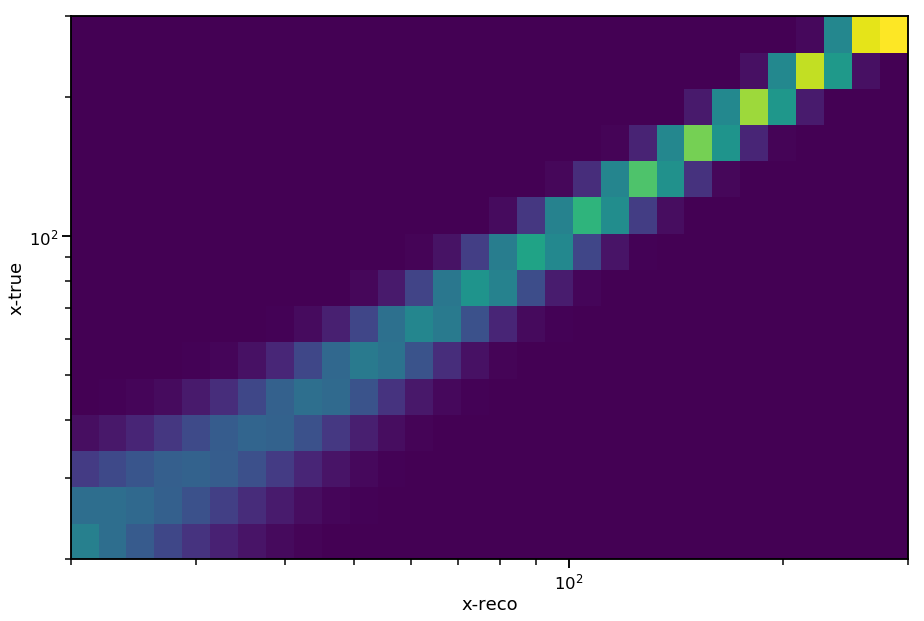

In [42]:
def get_resolution(xtrue):
    return (0.1 / np.sqrt(xtrue) + 0.5) * xtrue  # random numbers

migration_matrix = np.zeros([NBINS_TRUE, NBINS_RECO])
for true_bin in range(NBINS_TRUE):
    for reco_bin in range(NBINS_RECO):
        xtrue = xtrue_centers[true_bin]
        xreco = xreco_centers[reco_bin]
        resolution = get_resolution(xreco)  # nevermind if this is reco
        migration_matrix[true_bin][reco_bin] = np.exp(-(xreco - xtrue) ** 2 / (2 * resolution))

migration_matrix = migration_matrix / migration_matrix.sum(axis=0)

with sns.plotting_context("talk"):
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.pcolormesh(xreco_edges, xtrue_edges, migration_matrix)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('x-reco')
    ax.set_ylabel('x-true')

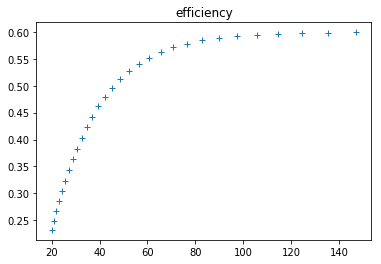

In [65]:
def get_efficiency(xreco):
    return 0.60 - np.exp(-xreco / 20.)

efficiency = get_efficiency(xreco_centers)
fig, ax = plt.subplots()
ax.plot(xreco_centers, efficiency, '+')
ax.set_title('efficiency')
plt.show()

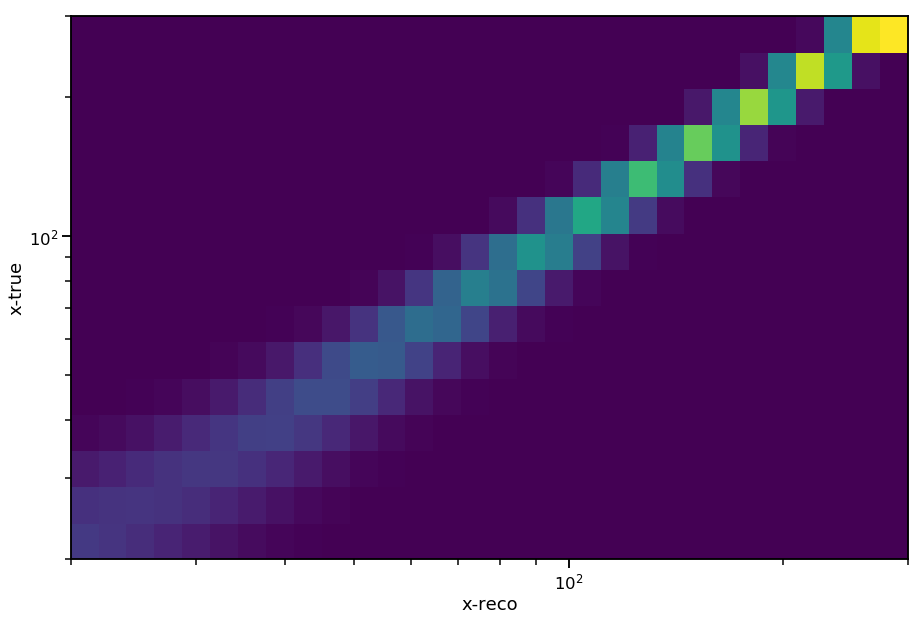

In [33]:
folding_matrix = migration_matrix * efficiency

with sns.plotting_context("talk"):
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.pcolormesh(xreco_edges, xtrue_edges, folding_matrix)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('x-reco')
    ax.set_ylabel('x-true')

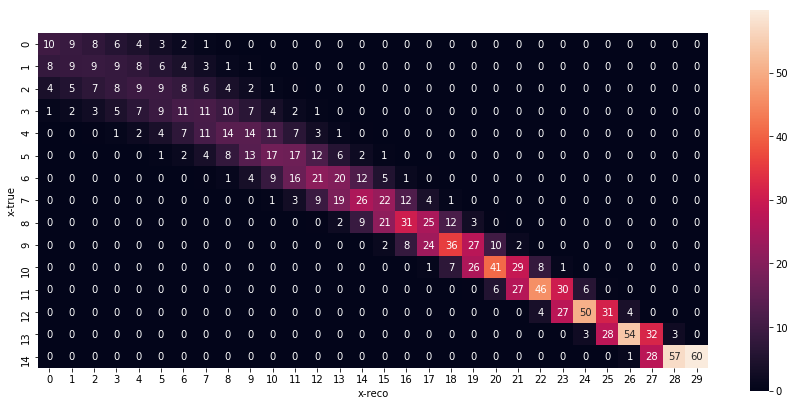

In [39]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(folding_matrix * 100, annot=True, square=True, ax=ax, fmt='.0f')
ax.set_xlabel('x-reco')
ax.set_ylabel('x-true')
plt.show()

In [78]:
NTOYS = 10000
toy_true_xvalues = exponential.rvs(NTOYS)
resolutions = get_resolution(toy_true_xvalues)
smearing = np.random.normal(1, resolutions, size=NTOYS)
toy_reco_xvalues = toy_true_xvalues + smearing
toy_pass = np.random.uniform(0, 1, size=NTOYS) < get_efficiency(toy_reco_xvalues)
#toy_reco_xvalues[] = toy_true_xvalues[toy_pass]


In [79]:
np.where(toy_pass, toy_reco_xvalues, np.nan)

array([137.93276293,          nan,  63.77604947, ...,  56.0265387 ,
                nan,          nan])